# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

### (1) Definition of probability intervals for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [2]:
# Variable pdf width!!!
# Precision better for small than for large mean

def sigma(mean):
    sig = 1.+np.arctan(mean-1)/np.pi
    return sig

# Return value of x corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 

In [3]:
# Bayesian limit

def bayeslim(xm,cl):
    
    sigm = sigma(xm)
    
    # numerical integration settings
    
    mmin = xm-5*sigm
    mmax = xm+5*sigm
    mbin = 2000
    
    dm = (mmax-mmin)/mbin
    mval = np.linspace(mmin+dm/2,mmax-dm/2,mbin)
    sval = sigma(mval)
    dp = dm*norm.pdf(xm,mval,sval)
    
    pint = np.sum(dp)
    
    psum = 0
    mlim = mmin
    
    for im in range(mbin):
        psum+=dp[im]/pint
        if(psum>cl):
            mlim = mval[im]-dm/2
            break
#        print(mval[im],sval[im],dp[im],psum)  # Debug output
    
    return mlim


### (2) Define set of hypothesis

In [4]:
# Considered values of true mean

# vmean = np.linspace(0.,6.0,13)
vmean = np.linspace(0.,6.0,121)
# vmean = np.linspace(0.,6.0,601)

CL = 0.95            # One sided! So the central inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)

# Values of measured x (for Bayesian curve)

vmeas = np.linspace(-2.,4.,61)

vbay = np.empty(vmeas.size)

for im in range(vmeas.size):
    vbay[im] = bayeslim(vmeas[im],CL)


### (3)  Print interval information

In [5]:
print("\nUpper Bayes limit for mu:")

print("\n  Measured x     mu_ul ")

for im in range(vmeas.size) :
    print ("%10.3f   %8.3f " % (vmeas[im],vbay[im]))



Upper Bayes limit for mu:

  Measured x     mu_ul 
    -2.000     -0.834 
    -1.900     -0.704 
    -1.800     -0.566 
    -1.700     -0.425 
    -1.600     -0.274 
    -1.500     -0.115 
    -1.400      0.052 
    -1.300      0.223 
    -1.200      0.396 
    -1.100      0.568 
    -1.000      0.736 
    -0.900      0.896 
    -0.800      1.049 
    -0.700      1.194 
    -0.600      1.335 
    -0.500      1.469 
    -0.400      1.602 
    -0.300      1.730 
    -0.200      1.859 
    -0.100      1.983 
     0.000      2.107 
     0.100      2.232 
     0.200      2.355 
     0.300      2.479 
     0.400      2.598 
     0.500      2.721 
     0.600      2.837 
     0.700      2.954 
     0.800      3.073 
     0.900      3.190 
     1.000      3.300 
     1.100      3.416 
     1.200      3.528 
     1.300      3.639 
     1.400      3.749 
     1.500      3.853 
     1.600      3.962 
     1.700      4.071 
     1.800      4.175 
     1.900      4.280 
     2.000      4.387 
     

### (4) Draw probability intervals

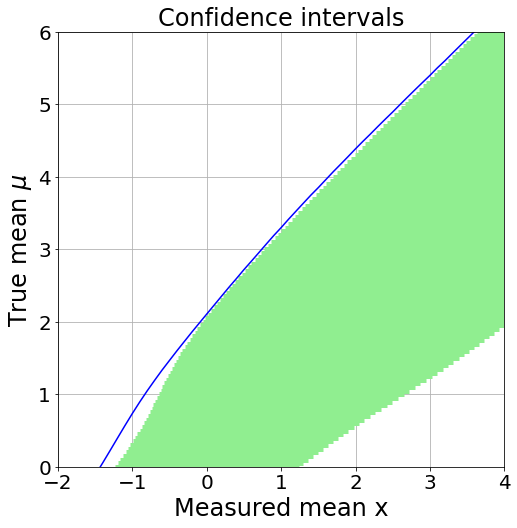

In [6]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vmeas,vbay,'-',color='blue')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_bayes.png'
plt.savefig(fname)
